In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

print(f"TensorFlow version = {tf.__version__}\n")

# Set a fixed random seed value, for reproducibility, this will allow us to get
# the same random numbers each time the notebook is run
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

# the list of gestures that data is available for
GESTURES = [
    "dik_sag",
    "dik_sol",
    "yatay_duz",
]

SAMPLES_PER_GESTURE = 25

NUM_GESTURES = len(GESTURES)

# create a one-hot encoded matrix that is used in the output
ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES)

inputs = []
outputs = []

# read each csv file and push an input and output
for gesture_index in range(NUM_GESTURES):
    
  gesture = GESTURES[gesture_index]
  print(f"Processing index {gesture_index} for gesture '{gesture}'.")
  
  output = ONE_HOT_ENCODED_GESTURES[gesture_index]
  
  df = pd.read_csv(gesture + ".csv",header=None)

  # calculate the number of gesture recordings in the file
  num_recordings = int(df.shape[0] / SAMPLES_PER_GESTURE)
  
  print(f"\tThere are {num_recordings} recordings of the {gesture} gesture.")
  
  for i in range(num_recordings):
    tensor = []
    for j in range(SAMPLES_PER_GESTURE):
      index = i * SAMPLES_PER_GESTURE + j
      # normalize the input data, between 0 to 1:
      # - acceleration is between: -4 to +4
      # - gyroscope is between: -2000 to +2000
      tensor += [
          (df[1][index] + 10000) / 20000,
          (df[2][index] + 10000) / 20000,
          (df[3][index] + 10000) / 20000,

      ]

    inputs.append(tensor)
    outputs.append(output)

# convert the list to numpy array
inputs = np.array(inputs)
outputs = np.array(outputs)

print("Data set parsing and preparation complete.")


TensorFlow version = 2.9.0

Processing index 0 for gesture 'dik_sag'.
	There are 1706 recordings of the dik_sag gesture.
Processing index 1 for gesture 'dik_sol'.
	There are 1761 recordings of the dik_sol gesture.
Processing index 2 for gesture 'yatay_duz'.
	There are 1879 recordings of the yatay_duz gesture.
Data set parsing and preparation complete.


In [2]:

# Randomize the order of the inputs, so they can be evenly distributed for training, testing, and validation
# https://stackoverflow.com/a/37710486/2020087
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

# Swap the consecutive indexes (0, 1, 2, etc) with the randomized indexes
inputs = inputs[randomize]
outputs = outputs[randomize]

# Split the recordings (group of samples) into three sets: training, testing and validation
TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print("Data set randomization and splitting complete.")


Data set randomization and splitting complete.


In [3]:

# build the model and train it
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(75, activation='relu')) # relu is used for performance
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(NUM_GESTURES, activation='softmax')) # softmax is used, because we only expect one gesture to occur per input
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(inputs_train, outputs_train, epochs=600, batch_size=30, validation_data=(inputs_validate, outputs_validate))


Epoch 1/600
107/107 [==============================] - 2s 6ms/step - loss: 0.0465 - mae: 0.1609 - val_loss: 9.6513e-04 - val_mae: 0.0272
Epoch 2/600
107/107 [==============================] - 0s 3ms/step - loss: 1.6689e-04 - mae: 0.0089 - val_loss: 2.8759e-06 - val_mae: 0.0015
Epoch 3/600
107/107 [==============================] - 0s 4ms/step - loss: 5.3576e-07 - mae: 5.2173e-04 - val_loss: 2.8406e-08 - val_mae: 1.4627e-04
Epoch 4/600
107/107 [==============================] - 0s 4ms/step - loss: 1.1556e-08 - mae: 9.0284e-05 - val_loss: 4.9825e-09 - val_mae: 6.1185e-05
Epoch 5/600
107/107 [==============================] - 0s 4ms/step - loss: 3.4647e-09 - mae: 5.0739e-05 - val_loss: 2.4537e-09 - val_mae: 4.2862e-05
Epoch 6/600
107/107 [==============================] - 0s 4ms/step - loss: 1.9804e-09 - mae: 3.8455e-05 - val_loss: 1.5981e-09 - val_mae: 3.4561e-05
Epoch 7/600
107/107 [==============================] - 0s 4ms/step - loss: 1.3740e-09 - mae: 3.2037e-05 - val_loss: 1.1754e-09

Epoch 56/600
107/107 [==============================] - 1s 5ms/step - loss: 7.6308e-11 - mae: 7.5380e-06 - val_loss: 7.5273e-11 - val_mae: 7.4827e-06
Epoch 57/600
107/107 [==============================] - 0s 4ms/step - loss: 7.4837e-11 - mae: 7.4649e-06 - val_loss: 7.3808e-11 - val_mae: 7.4093e-06
Epoch 58/600
107/107 [==============================] - 0s 4ms/step - loss: 7.3399e-11 - mae: 7.3926e-06 - val_loss: 7.2402e-11 - val_mae: 7.3382e-06
Epoch 59/600
107/107 [==============================] - 0s 4ms/step - loss: 7.2012e-11 - mae: 7.3222e-06 - val_loss: 7.1071e-11 - val_mae: 7.2703e-06
Epoch 60/600
107/107 [==============================] - 0s 3ms/step - loss: 7.0692e-11 - mae: 7.2545e-06 - val_loss: 6.9761e-11 - val_mae: 7.2027e-06
Epoch 61/600
107/107 [==============================] - 0s 4ms/step - loss: 6.9416e-11 - mae: 7.1886e-06 - val_loss: 6.8508e-11 - val_mae: 7.1375e-06
Epoch 62/600
107/107 [==============================] - 0s 4ms/step - loss: 6.8167e-11 - mae: 7.1234

107/107 [==============================] - 0s 4ms/step - loss: 3.6341e-11 - mae: 5.1987e-06 - val_loss: 3.6009e-11 - val_mae: 5.1722e-06
Epoch 111/600
107/107 [==============================] - 0s 4ms/step - loss: 3.5977e-11 - mae: 5.1726e-06 - val_loss: 3.5667e-11 - val_mae: 5.1474e-06
Epoch 112/600
107/107 [==============================] - 0s 4ms/step - loss: 3.5641e-11 - mae: 5.1482e-06 - val_loss: 3.5329e-11 - val_mae: 5.1230e-06
Epoch 113/600
107/107 [==============================] - 0s 4ms/step - loss: 3.5301e-11 - mae: 5.1237e-06 - val_loss: 3.4995e-11 - val_mae: 5.0986e-06
Epoch 114/600
107/107 [==============================] - 0s 4ms/step - loss: 3.4970e-11 - mae: 5.0996e-06 - val_loss: 3.4667e-11 - val_mae: 5.0745e-06
Epoch 115/600
107/107 [==============================] - 0s 4ms/step - loss: 3.4645e-11 - mae: 5.0756e-06 - val_loss: 3.4340e-11 - val_mae: 5.0504e-06
Epoch 116/600
107/107 [==============================] - 0s 4ms/step - loss: 3.4314e-11 - mae: 5.0513e-06 - 

107/107 [==============================] - 0s 4ms/step - loss: 2.3566e-11 - mae: 4.1862e-06 - val_loss: 2.3399e-11 - val_mae: 4.1690e-06
Epoch 165/600
107/107 [==============================] - 0s 4ms/step - loss: 2.3419e-11 - mae: 4.1728e-06 - val_loss: 2.3248e-11 - val_mae: 4.1553e-06
Epoch 166/600
107/107 [==============================] - 0s 4ms/step - loss: 2.3259e-11 - mae: 4.1587e-06 - val_loss: 2.3093e-11 - val_mae: 4.1415e-06
Epoch 167/600
107/107 [==============================] - 0s 4ms/step - loss: 2.3107e-11 - mae: 4.1452e-06 - val_loss: 2.2948e-11 - val_mae: 4.1285e-06
Epoch 168/600
107/107 [==============================] - 0s 4ms/step - loss: 2.2959e-11 - mae: 4.1320e-06 - val_loss: 2.2801e-11 - val_mae: 4.1154e-06
Epoch 169/600
107/107 [==============================] - 0s 4ms/step - loss: 2.2822e-11 - mae: 4.1194e-06 - val_loss: 2.2662e-11 - val_mae: 4.1027e-06
Epoch 170/600
107/107 [==============================] - 0s 4ms/step - loss: 2.2691e-11 - mae: 4.1073e-06 - 

107/107 [==============================] - 0s 4ms/step - loss: 1.7424e-11 - mae: 3.5984e-06 - val_loss: 1.7317e-11 - val_mae: 3.5855e-06
Epoch 219/600
107/107 [==============================] - 0s 4ms/step - loss: 1.7339e-11 - mae: 3.5897e-06 - val_loss: 1.7230e-11 - val_mae: 3.5765e-06
Epoch 220/600
107/107 [==============================] - 0s 4ms/step - loss: 1.7257e-11 - mae: 3.5812e-06 - val_loss: 1.7149e-11 - val_mae: 3.5680e-06
Epoch 221/600
107/107 [==============================] - 0s 4ms/step - loss: 1.7177e-11 - mae: 3.5727e-06 - val_loss: 1.7071e-11 - val_mae: 3.5598e-06
Epoch 222/600
107/107 [==============================] - 0s 4ms/step - loss: 1.7102e-11 - mae: 3.5647e-06 - val_loss: 1.6990e-11 - val_mae: 3.5510e-06
Epoch 223/600
107/107 [==============================] - 0s 3ms/step - loss: 1.7024e-11 - mae: 3.5564e-06 - val_loss: 1.6915e-11 - val_mae: 3.5429e-06
Epoch 224/600
107/107 [==============================] - 0s 3ms/step - loss: 1.6942e-11 - mae: 3.5477e-06 - 

107/107 [==============================] - 0s 3ms/step - loss: 1.3812e-11 - mae: 3.2028e-06 - val_loss: 1.3729e-11 - val_mae: 3.1915e-06
Epoch 273/600
107/107 [==============================] - 0s 3ms/step - loss: 1.3756e-11 - mae: 3.1965e-06 - val_loss: 1.3669e-11 - val_mae: 3.1847e-06
Epoch 274/600
107/107 [==============================] - 0s 3ms/step - loss: 1.3700e-11 - mae: 3.1900e-06 - val_loss: 1.3616e-11 - val_mae: 3.1785e-06
Epoch 275/600
107/107 [==============================] - 0s 3ms/step - loss: 1.3641e-11 - mae: 3.1832e-06 - val_loss: 1.3561e-11 - val_mae: 3.1722e-06
Epoch 276/600
107/107 [==============================] - 0s 3ms/step - loss: 1.3588e-11 - mae: 3.1770e-06 - val_loss: 1.3510e-11 - val_mae: 3.1662e-06
Epoch 277/600
107/107 [==============================] - 0s 3ms/step - loss: 1.3533e-11 - mae: 3.1705e-06 - val_loss: 1.3458e-11 - val_mae: 3.1602e-06
Epoch 278/600
107/107 [==============================] - 0s 3ms/step - loss: 1.3482e-11 - mae: 3.1646e-06 - 

107/107 [==============================] - 0s 3ms/step - loss: 1.1283e-11 - mae: 2.8964e-06 - val_loss: 1.1224e-11 - val_mae: 2.8872e-06
Epoch 327/600
107/107 [==============================] - 0s 3ms/step - loss: 1.1248e-11 - mae: 2.8919e-06 - val_loss: 1.1189e-11 - val_mae: 2.8828e-06
Epoch 328/600
107/107 [==============================] - 0s 3ms/step - loss: 1.1213e-11 - mae: 2.8876e-06 - val_loss: 1.1154e-11 - val_mae: 2.8784e-06
Epoch 329/600
107/107 [==============================] - 0s 3ms/step - loss: 1.1182e-11 - mae: 2.8836e-06 - val_loss: 1.1123e-11 - val_mae: 2.8744e-06
Epoch 330/600
107/107 [==============================] - 0s 3ms/step - loss: 1.1151e-11 - mae: 2.8796e-06 - val_loss: 1.1095e-11 - val_mae: 2.8707e-06
Epoch 331/600
107/107 [==============================] - 0s 3ms/step - loss: 1.1122e-11 - mae: 2.8758e-06 - val_loss: 1.1066e-11 - val_mae: 2.8668e-06
Epoch 332/600
107/107 [==============================] - 0s 3ms/step - loss: 1.1091e-11 - mae: 2.8715e-06 - 

107/107 [==============================] - 0s 4ms/step - loss: 9.6254e-12 - mae: 2.6749e-06 - val_loss: 9.5789e-12 - val_mae: 2.6668e-06
Epoch 381/600
107/107 [==============================] - 0s 5ms/step - loss: 9.6046e-12 - mae: 2.6719e-06 - val_loss: 9.5583e-12 - val_mae: 2.6639e-06
Epoch 382/600
107/107 [==============================] - 0s 4ms/step - loss: 9.5819e-12 - mae: 2.6686e-06 - val_loss: 9.5347e-12 - val_mae: 2.6605e-06
Epoch 383/600
107/107 [==============================] - 0s 5ms/step - loss: 9.5583e-12 - mae: 2.6652e-06 - val_loss: 9.5138e-12 - val_mae: 2.6575e-06
Epoch 384/600
107/107 [==============================] - 0s 4ms/step - loss: 9.5346e-12 - mae: 2.6618e-06 - val_loss: 9.4876e-12 - val_mae: 2.6537e-06
Epoch 385/600
107/107 [==============================] - 0s 4ms/step - loss: 9.5108e-12 - mae: 2.6582e-06 - val_loss: 9.4596e-12 - val_mae: 2.6498e-06
Epoch 386/600
107/107 [==============================] - 0s 4ms/step - loss: 9.4849e-12 - mae: 2.6546e-06 - 

107/107 [==============================] - 0s 4ms/step - loss: 8.3574e-12 - mae: 2.4917e-06 - val_loss: 8.3134e-12 - val_mae: 2.4838e-06
Epoch 435/600
107/107 [==============================] - 0s 4ms/step - loss: 8.3362e-12 - mae: 2.4887e-06 - val_loss: 8.2945e-12 - val_mae: 2.4811e-06
Epoch 436/600
107/107 [==============================] - 0s 4ms/step - loss: 8.3158e-12 - mae: 2.4857e-06 - val_loss: 8.2748e-12 - val_mae: 2.4782e-06
Epoch 437/600
107/107 [==============================] - 0s 4ms/step - loss: 8.2968e-12 - mae: 2.4830e-06 - val_loss: 8.2565e-12 - val_mae: 2.4756e-06
Epoch 438/600
107/107 [==============================] - 0s 4ms/step - loss: 8.2776e-12 - mae: 2.4802e-06 - val_loss: 8.2401e-12 - val_mae: 2.4731e-06
Epoch 439/600
107/107 [==============================] - 0s 5ms/step - loss: 8.2615e-12 - mae: 2.4778e-06 - val_loss: 8.2233e-12 - val_mae: 2.4706e-06
Epoch 440/600
107/107 [==============================] - 0s 4ms/step - loss: 8.2451e-12 - mae: 2.4753e-06 - 

107/107 [==============================] - 0s 5ms/step - loss: 7.4001e-12 - mae: 2.3450e-06 - val_loss: 7.3664e-12 - val_mae: 2.3384e-06
Epoch 489/600
107/107 [==============================] - 0s 4ms/step - loss: 7.3829e-12 - mae: 2.3422e-06 - val_loss: 7.3500e-12 - val_mae: 2.3357e-06
Epoch 490/600
107/107 [==============================] - 0s 4ms/step - loss: 7.3665e-12 - mae: 2.3396e-06 - val_loss: 7.3352e-12 - val_mae: 2.3333e-06
Epoch 491/600
107/107 [==============================] - 0s 3ms/step - loss: 7.3513e-12 - mae: 2.3371e-06 - val_loss: 7.3203e-12 - val_mae: 2.3309e-06
Epoch 492/600
107/107 [==============================] - 0s 3ms/step - loss: 7.3361e-12 - mae: 2.3346e-06 - val_loss: 7.3062e-12 - val_mae: 2.3286e-06
Epoch 493/600
107/107 [==============================] - 0s 3ms/step - loss: 7.3220e-12 - mae: 2.3322e-06 - val_loss: 7.2895e-12 - val_mae: 2.3258e-06
Epoch 494/600
107/107 [==============================] - 0s 4ms/step - loss: 7.3073e-12 - mae: 2.3298e-06 - 

107/107 [==============================] - 0s 3ms/step - loss: 6.6331e-12 - mae: 2.2193e-06 - val_loss: 6.5999e-12 - val_mae: 2.2126e-06
Epoch 543/600
107/107 [==============================] - 0s 3ms/step - loss: 6.6160e-12 - mae: 2.2165e-06 - val_loss: 6.5830e-12 - val_mae: 2.2097e-06
Epoch 544/600
107/107 [==============================] - 0s 3ms/step - loss: 6.5989e-12 - mae: 2.2137e-06 - val_loss: 6.5676e-12 - val_mae: 2.2072e-06
Epoch 545/600
107/107 [==============================] - 0s 4ms/step - loss: 6.5835e-12 - mae: 2.2112e-06 - val_loss: 6.5527e-12 - val_mae: 2.2047e-06
Epoch 546/600
107/107 [==============================] - 0s 3ms/step - loss: 6.5677e-12 - mae: 2.2085e-06 - val_loss: 6.5365e-12 - val_mae: 2.2020e-06
Epoch 547/600
107/107 [==============================] - 0s 3ms/step - loss: 6.5538e-12 - mae: 2.2062e-06 - val_loss: 6.5233e-12 - val_mae: 2.1998e-06
Epoch 548/600
107/107 [==============================] - 0s 3ms/step - loss: 6.5392e-12 - mae: 2.2038e-06 - 

107/107 [==============================] - 0s 3ms/step - loss: 6.0188e-12 - mae: 2.1133e-06 - val_loss: 5.9878e-12 - val_mae: 2.1068e-06
Epoch 597/600
107/107 [==============================] - 0s 3ms/step - loss: 6.0085e-12 - mae: 2.1114e-06 - val_loss: 5.9782e-12 - val_mae: 2.1049e-06
Epoch 598/600
107/107 [==============================] - 0s 3ms/step - loss: 5.9985e-12 - mae: 2.1095e-06 - val_loss: 5.9688e-12 - val_mae: 2.1031e-06
Epoch 599/600
107/107 [==============================] - 0s 3ms/step - loss: 5.9889e-12 - mae: 2.1077e-06 - val_loss: 5.9582e-12 - val_mae: 2.1012e-06
Epoch 600/600
107/107 [==============================] - 0s 3ms/step - loss: 5.9792e-12 - mae: 2.1059e-06 - val_loss: 5.9465e-12 - val_mae: 2.0992e-06


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 75)                5700      
                                                                 
 dense_1 (Dense)             (None, 15)                1140      
                                                                 
 dense_2 (Dense)             (None, 3)                 48        
                                                                 
Total params: 6,888
Trainable params: 6,888
Non-trainable params: 0
_________________________________________________________________


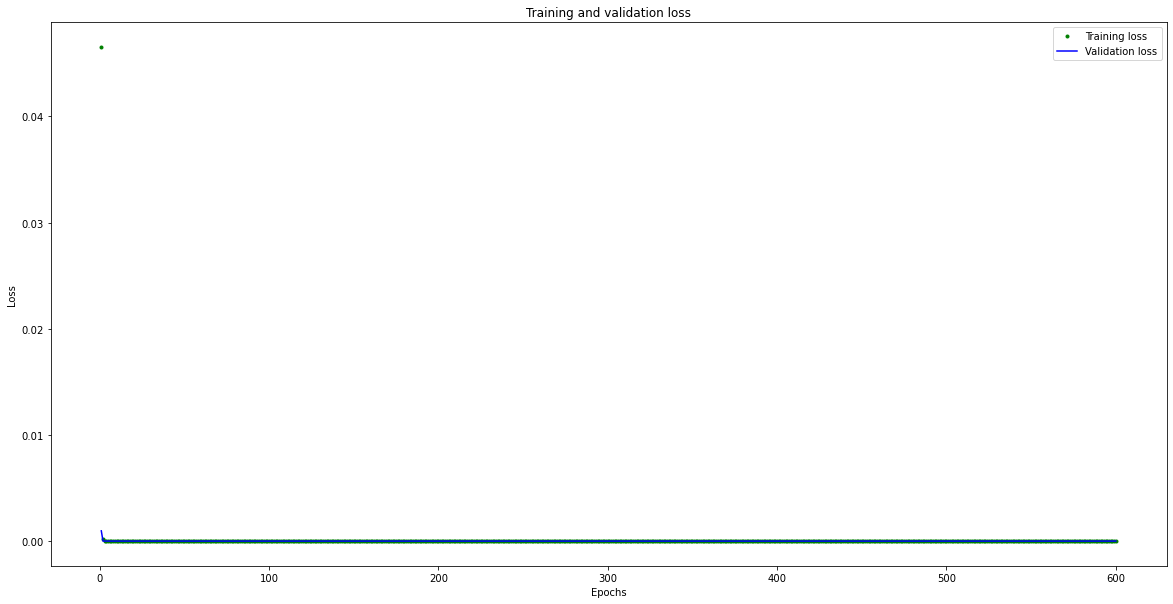

[20.0, 10.0]


In [5]:

# increase the size of the graphs. The default size is (6,4).
plt.rcParams["figure.figsize"] = (20,10)

# graph the loss, the model above is configure to use "mean squared error" as the loss function
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(plt.rcParams["figure.figsize"])

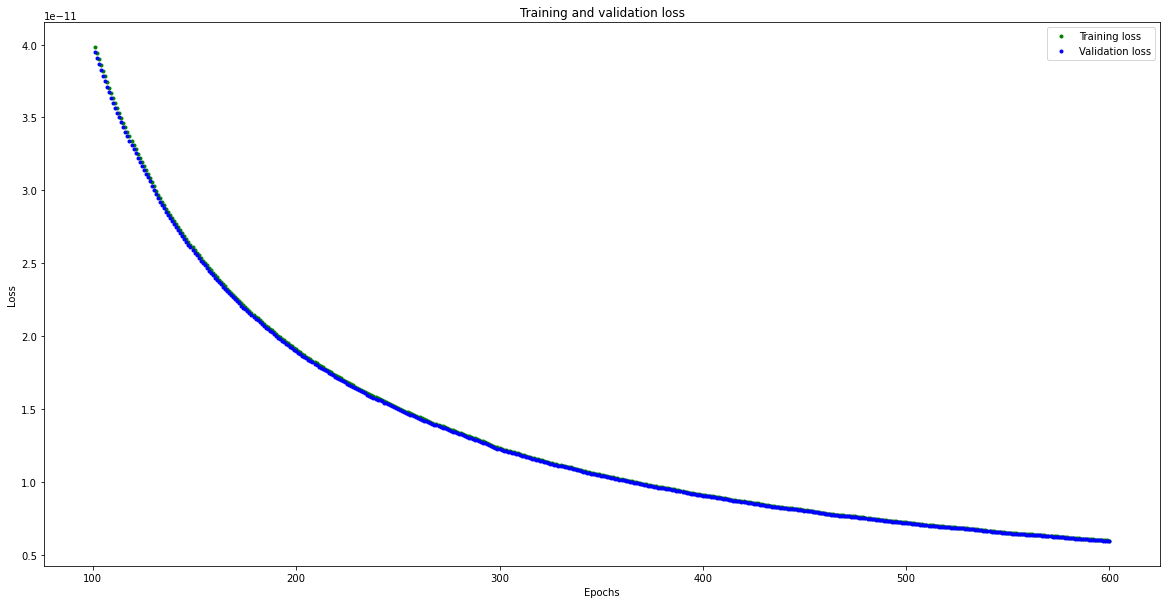

In [6]:

# graph the loss again skipping a bit of the start
SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

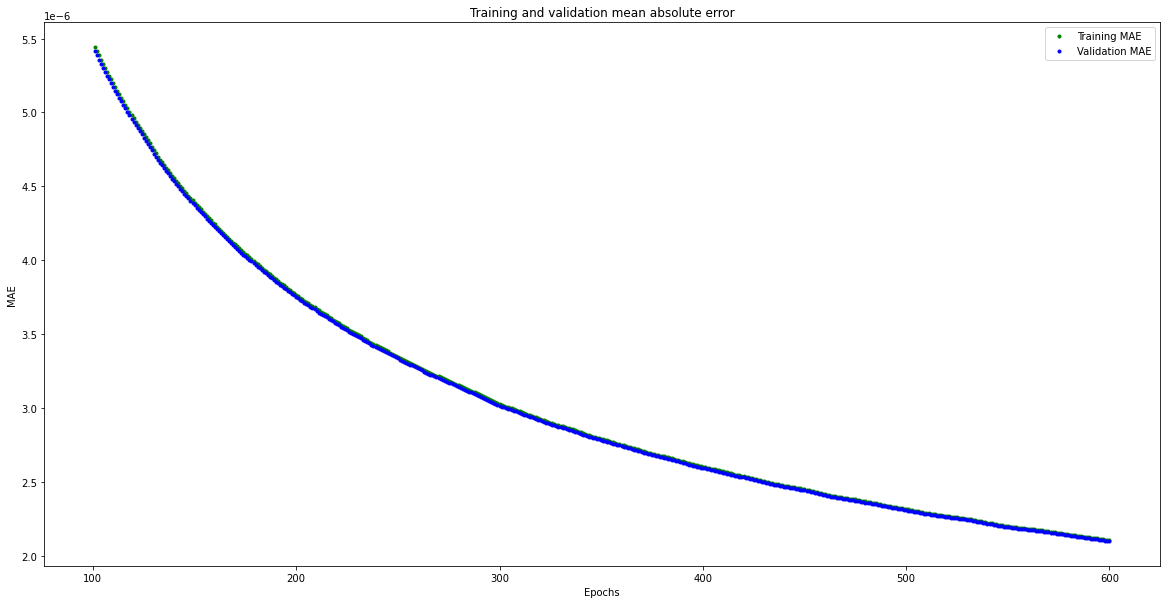

In [7]:

# graph of mean absolute error
mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


34/34 [==============================] - 0s 2ms/step
predictions =
 [[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]
actual =
 [[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


ValueError: x has 75 columns but y has 3 columns

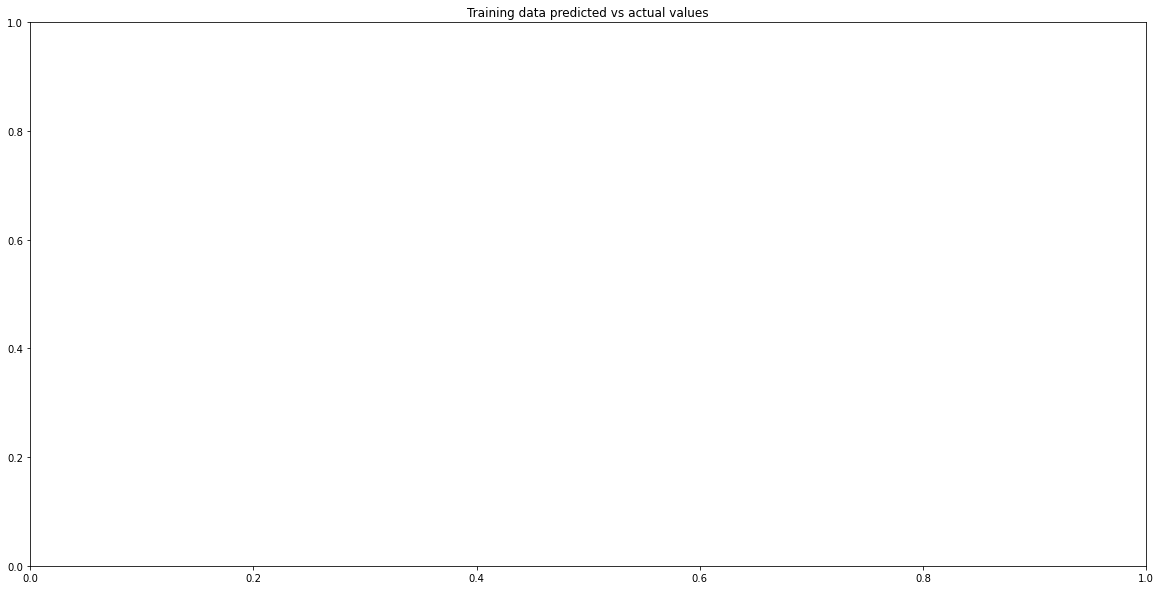

In [8]:
# use the model to predict the test inputs
predictions = model.predict(inputs_test)

# print the predictions and the expected ouputs
print("predictions =\n", np.round(predictions, decimals=3))
print("actual =\n", outputs_test)

# Plot the predictions along with to the test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(inputs_test, outputs_test, 'b.', label='Actual')
plt.plot(inputs_test, predictions, 'r.', label='Predicted')
plt.show()

Convert the Trained Model to Tensor Flow Lite

In [9]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("gesture_model.tflite", "wb").write(tflite_model)
  
import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)

INFO:tensorflow:Assets written to: C:\Users\DELL\AppData\Local\Temp\tmp6_ujoad4\assets
Model is 29588 bytes
